In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [143]:
prod_crops_ds_filename = [filename for filename in os.listdir('data') if filename.startswith('Production')]

In [144]:
prod_crops_ds_filename

['Production_Crops_E_Oceania.csv',
 'Production_Crops_E_Europe.csv',
 'Production_Crops_E_Africa.csv',
 'Production_Crops_E_Asia.csv',
 'Production_Crops_E_Americas.csv']

In [145]:
pd.options.display.max_columns = None

In [146]:
df = pd.DataFrame()
for filename in prod_crops_ds_filename:
    temp_df = pd.read_csv(os.path.join('data', filename), encoding='ISO-8859-1')
    df = pd.concat([df, temp_df])

In [147]:
df

Area Code                                Area  Item Code   
0            10                           Australia        221  \
1            10                           Australia        221   
2            10                           Australia        221   
3            10                           Australia        711   
4            10                           Australia        711   
...         ...                                 ...        ...   
7201        236  Venezuela (Bolivarian Republic of)       1723   
7202        236  Venezuela (Bolivarian Republic of)       1723   
7203        236  Venezuela (Bolivarian Republic of)       1735   
7204        236  Venezuela (Bolivarian Republic of)       1735   
7205        236  Venezuela (Bolivarian Republic of)       1735   

                                  Item  Element Code         Element    Unit   
0                  Almonds, with shell          5312  Area harvested      ha  \
1                  Almonds, with shell          5419           Yield   hg/ha   
2                  Almonds, with shell          5510      Production  tonnes   
3     Anise, badian, fennel, coriander          5312  Area harvested      ha   
4     Anise, badian, fennel, coriander          5419           Yield   hg/ha   
...                                ...           ...             ...     ...   
7201               Sugar Crops Primary          5419           Yield   hg/ha   
7202               Sugar Crops Primary          5510      Production  tonnes   
7203                Vegetables Primary          5312  Area harvested      ha   
7204                Vegetables Primary          5419           Yield   hg/ha   
7205                Vegetables Primary          5510      Production  tonnes   

          Y1961 Y1961F      Y1962 Y1962F      Y1963 Y1963F      Y1964 Y1964F   
0           NaN      M        NaN      M        NaN      M        NaN      M  \
1           NaN    NaN        NaN    NaN        NaN    NaN        NaN    NaN   
2           NaN      M        NaN      M        NaN      M        NaN      M   
3           NaN      M        NaN      M        NaN      M        NaN      M   
4           NaN    NaN        NaN    NaN        NaN    NaN        NaN    NaN   
...         ...    ...        ...    ...        ...    ...        ...    ...   
7201   624620.0     Fc   665742.0     Fc   656528.0     Fc   692711.0     Fc   
7202  2519028.0      A  2632476.0      A  2813223.0      A  3227409.0      A   
7203    10176.0      A     9202.0      A     9798.0      A    11451.0      A   
7204   134928.0     Fc   131391.0     Fc   129037.0     Fc   137222.0     Fc   
7205   137303.0      A   120906.0      A   126430.0      A   157133.0      A   

          Y1965 Y1965F      Y1966 Y1966F      Y1967 Y1967F      Y1968 Y1968F   
0           NaN      M        NaN      M        NaN      M        NaN      M  \
1           NaN    NaN        NaN    NaN        NaN    NaN        NaN    NaN   
2           NaN      M        NaN      M        NaN      M        NaN      M   
3           NaN      M        NaN      M        NaN      M        NaN      M   
4           NaN    NaN        NaN    NaN        NaN    NaN        NaN    NaN   
...         ...    ...        ...    ...        ...    ...        ...    ...   
7201   731912.0     Fc   766404.0     Fc   803428.0     Fc   757190.0     Fc   
7202  3704424.0      A  4034353.0      A  4185940.0      A  3727572.0      A   
7203    11799.0      A    12300.0      A    11304.0      A    12077.0      A   
7204   136760.0     Fc   134095.0     Fc   138694.0     Fc   147388.0     Fc   
7205   161363.0      A   164937.0      A   156780.0      A   178000.0      A   

          Y1969 Y1969F      Y1970 Y1970F      Y1971 Y1971F      Y1972 Y1972F   
0           NaN      M        NaN      M        NaN      M        NaN      M  \
1           NaN    NaN        NaN    NaN        NaN    NaN        NaN    NaN   
2           NaN      M        NaN      M        NaN      M        NaN      M   
3         

In [148]:
flags = pd.read_csv('data/flags.csv', encoding='ISO-8859-1')
flags.columns = ['Flag', 'Flag Description']
flags.set_index('Flag', inplace=True)
flag_to_description = flags.to_dict(orient='dict')['Flag Description']
flag_to_description

{nan: 'Not applicable',
 '*': 'Unofficial figure',
 'A': 'Aggregate, may include official, semi-official, estimated or calculated data',
 'Bk': 'Break in series',
 'C': 'Calculated',
 'Ce': 'Calculated data based on estimated data',
 'Cv': 'Calculated through value',
 'E': 'Expert sources from FAO (including other divisions)',
 'F': 'FAO estimate',
 'Fb': 'Data obtained as a balance',
 'Fc': 'Calculated data',
 'Fd': 'estimates - discontinued time series',
 'Fk': 'Calculated data on the basis of official figures',
 'Fm': 'Manual Estimation',
 'I': 'Country data reported by International Organizations where the country is a member (Semi-official) - WTO, EU, UNSD, etc.',
 'Im': 'FAO data based on imputation methodology',
 'M': 'Data not available',
 'NR': 'Not reported',
 'NV': 'Data not available',
 'Od': 'Official data - discontinued time series',
 'P': 'Provisional official data',
 'Q': 'Official data reported on FAO Questionnaires from countries',
 'Qm': 'Official data from questionn

In [149]:
cols = df.columns[:7].to_list()
value_columns = [col for col in df.columns if col.startswith('Y') and not col.endswith('F')]
flag_columns = [col for col in df.columns if col.startswith('Y') and col.endswith('F')]
print(cols)
print(value_columns[:10])
print(flag_columns[:10])

['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element', 'Unit']
['Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970']
['Y1961F', 'Y1962F', 'Y1963F', 'Y1964F', 'Y1965F', 'Y1966F', 'Y1967F', 'Y1968F', 'Y1969F', 'Y1970F']


In [150]:
df_values = df.melt(id_vars=cols, value_vars=value_columns, var_name='Year', value_name='Values')
df_values['Year'] = df_values['Year'].str[1:].astype(int)
df_flags = df.melt(id_vars=cols, value_vars=flag_columns, var_name='Year', value_name='Flags')
df_flags['Year'] = df_flags['Year'].str[1:-1].astype(int)

df = pd.merge(df_values, df_flags, on=cols + ['Year'])
df['Flag Description'] = df['Flags'].map(flag_to_description)
df

Area Code                                Area  Item Code   
0               10                           Australia        221  \
1               10                           Australia        221   
2               10                           Australia        221   
3               10                           Australia        711   
4               10                           Australia        711   
...            ...                                 ...        ...   
2250609        236  Venezuela (Bolivarian Republic of)       1723   
2250610        236  Venezuela (Bolivarian Republic of)       1723   
2250611        236  Venezuela (Bolivarian Republic of)       1735   
2250612        236  Venezuela (Bolivarian Republic of)       1735   
2250613        236  Venezuela (Bolivarian Republic of)       1735   

                                     Item  Element Code         Element   
0                     Almonds, with shell          5312  Area harvested  \
1                     Almonds, with shell          5419           Yield   
2                     Almonds, with shell          5510      Production   
3        Anise, badian, fennel, coriander          5312  Area harvested   
4        Anise, badian, fennel, coriander          5419           Yield   
...                                   ...           ...             ...   
2250609               Sugar Crops Primary          5419           Yield   
2250610               Sugar Crops Primary          5510      Production   
2250611                Vegetables Primary          5312  Area harvested   
2250612                Vegetables Primary          5419           Yield   
2250613                Vegetables Primary          5510      Production   

           Unit  Year     Values Flags   
0            ha  1961        NaN     M  \
1         hg/ha  1961        NaN   NaN   
2        tonnes  1961        NaN     M   
3            ha  1961        NaN     M   
4         hg/ha  1961        NaN   NaN   
...         ...   ...        ...   ...   
2250609   hg/ha  2019   590977.0    Fc   
2250610  tonnes  2019  4404728.0     A   
2250611      ha  2019    58775.0     A   
2250612   hg/ha  2019   193212.0    Fc   
2250613  tonnes  2019  1135606.0     A   

                                          Flag Description  
0                                       Data not available  
1                                           Not applicable  
2                                       Data not available  
3                                       Data not available  
4                                           Not applicable  
...                                                    ...  
2250609                                    Calculated data  
2250610  Aggregate, may include official, semi-official...  
2250611  Aggregate, may include official, semi-official...  
2250612                                    Calculated data  
2250613  Aggregate, may include official, semi-official...  

[2250614 rows x 11 columns]

In [151]:
df['Area'] = df['Area'].apply(lambda x: 'China' if x.startswith('China') else x)
df['Area'] = df['Area'].apply(lambda x: 'Venezuela' if x.startswith('Venezuela') else x)
df['Area'] = df['Area'].apply(lambda x: 'Bolivia' if x.startswith('Bolivia') else x)
df['Area'] = df['Area'].apply(lambda x: 'Russia' if x.startswith('Russia') else x)

In [129]:
df[df['Area'].str.contains('Russia')]

Area Code                Area  Item Code   
9236           185  Russian Federation        711  \
9237           185  Russian Federation        711   
9238           185  Russian Federation        711   
9239           185  Russian Federation        515   
9240           185  Russian Federation        515   
...            ...                 ...        ...   
2221954        185  Russian Federation       1729   
2221955        185  Russian Federation       1729   
2221956        185  Russian Federation       1735   
2221957        185  Russian Federation       1735   
2221958        185  Russian Federation       1735   

                                     Item  Element Code         Element   
9236     Anise, badian, fennel, coriander          5312  Area harvested  \
9237     Anise, badian, fennel, coriander          5419           Yield   
9238     Anise, badian, fennel, coriander          5510      Production   
9239                               Apples          5312  Area harvested   
9240                               Apples          5419           Yield   
...                                   ...           ...             ...   
2221954                   Treenuts, Total          5419           Yield   
2221955                   Treenuts, Total          5510      Production   
2221956                Vegetables Primary          5312  Area harvested   
2221957                Vegetables Primary          5419           Yield   
2221958                Vegetables Primary          5510      Production   

           Unit  Year      Values Flags   
9236         ha  1961         NaN   NaN  \
9237      hg/ha  1961         NaN   NaN   
9238     tonnes  1961         NaN   NaN   
9239         ha  1961         NaN   NaN   
9240      hg/ha  1961         NaN   NaN   
...         ...   ...         ...   ...   
2221954   hg/ha  2019     30314.0    Fc   
2221955  tonnes  2019     19686.0     A   
2221956      ha  2019    575034.0     A   
2221957   hg/ha  2019    246135.0    Fc   
2221958  tonnes  2019  14153617.0     A   

                                          Flag Description  
9236                                        Not applicable  
9237                                        Not applicable  
9238                                        Not applicable  
9239                                        Not applicable  
9240                                        Not applicable  
...                                                    ...  
2221954                                    Calculated data  
2221955  Aggregate, may include official, semi-official...  
2221956  Aggregate, may include official, semi-official...  
2221957                                    Calculated data  
2221958  Aggregate, may include official, semi-official...  

[15045 rows x 11 columns]

In [81]:
df.groupby(['Area', 'Element'])['Values'].describe()

count           mean            std   min   
Area        Element                                                      
Afghanistan Area harvested  2681.0  153936.203282  522186.272187   0.0  \
            Production      2740.0  281096.141241  755367.356707   0.0   
            Yield           2678.0   55115.862957   53459.302648   0.0   
Albania     Area harvested  2858.0   19079.224283   45241.009765   0.0   
            Production      3288.0   62687.506691  134289.672337   0.0   
...                            ...            ...            ...   ...   
Zambia      Production      2206.0  248405.043971  641573.232704   0.0   
            Yield           2146.0   85304.830382  224563.881211   0.0   
Zimbabwe    Area harvested  3875.0   88618.083613  274550.550681   0.0   
            Production      4063.0  167006.157027  589039.250711   0.0   
            Yield           3871.0   66144.597778  162379.413337  46.0   

                                 25%      50%        75%        max  
Area        Element                                                  
Afghanistan Area harvested   3000.00  13400.0   61690.00  3923100.0  
            Production      15000.00  39000.0  222833.50  6748023.0  
            Yield           10797.75  41995.0   83211.75   400000.0  
Albania     Area harvested    950.00   3112.5   18500.00   372500.0  
            Production       3782.00  12994.5   40394.75  1067000.0  
...                              ...      ...        ...        ...  
Zambia      Production       4203.00  26000.0  116351.25  4994302.0  
            Yield            7160.00  16026.0   61447.00  1243679.0  
Zimbabwe    Area harvested    200.00   2000.0   32785.50  2662879.0  
            Production        450.00   3436.0   65552.50  4811000.0  
            Yield            7982.00  32273.0   61538.00  1253030.0  

[621 rows x 8 columns]

In [82]:
df.groupby('Element')['Values'].describe()

count          mean           std  min      25%      50%   
Element                                                                       
Area harvested  541643.0  2.969293e+05  2.499832e+06  0.0    800.0   6000.0  \
Production      573748.0  1.180071e+06  1.114076e+07  0.0   2457.0  21831.5   
Yield           536699.0  1.096056e+05  1.066608e+06  0.0  11558.5  44000.0   

                      75%          max  
Element                                 
Area harvested   45400.00  125150000.0  
Production      167275.25  768594154.0  
Yield           111918.00  244995000.0

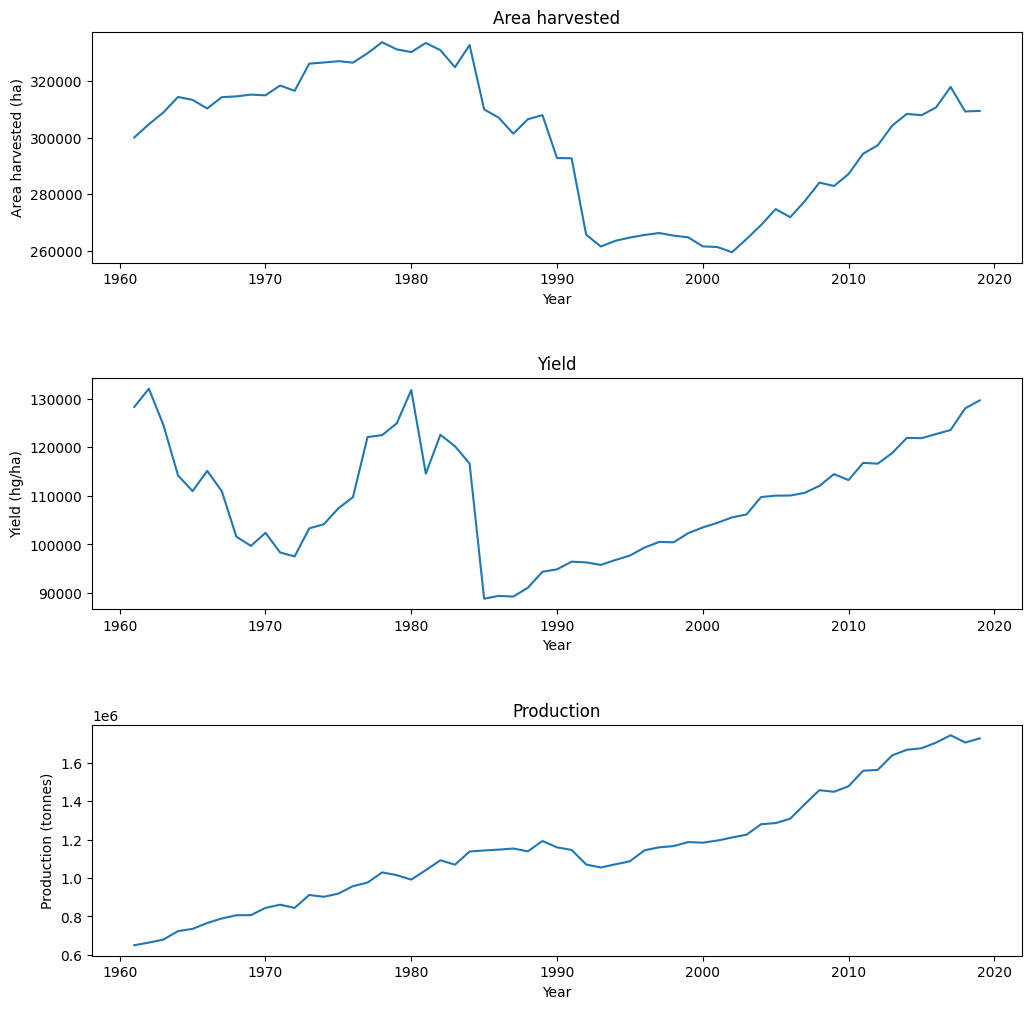

In [83]:
fig, axs = plt.subplots(figsize=(12, 12), nrows=3, ncols=1)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, element in enumerate(df['Element'].unique()):
    element_data = df[df['Element'] == element]
    axs[i].plot(element_data.groupby('Year')['Values'].mean())
    axs[i].set_title(element)
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel("{} ({})".format(element, element_data['Unit'].unique()[0]))


In [102]:
df

Area Code       Area  Item Code                              Item   
0               10  Australia        221               Almonds, with shell  \
1               10  Australia        221               Almonds, with shell   
2               10  Australia        221               Almonds, with shell   
3               10  Australia        711  Anise, badian, fennel, coriander   
4               10  Australia        711  Anise, badian, fennel, coriander   
...            ...        ...        ...                               ...   
2250609        236   Venezuel       1723               Sugar Crops Primary   
2250610        236   Venezuel       1723               Sugar Crops Primary   
2250611        236   Venezuel       1735                Vegetables Primary   
2250612        236   Venezuel       1735                Vegetables Primary   
2250613        236   Venezuel       1735                Vegetables Primary   

         Element Code         Element    Unit  Year     Values Flags   
0                5312  Area harvested      ha  1961        NaN     M  \
1                5419           Yield   hg/ha  1961        NaN   NaN   
2                5510      Production  tonnes  1961        NaN     M   
3                5312  Area harvested      ha  1961        NaN     M   
4                5419           Yield   hg/ha  1961        NaN   NaN   
...               ...             ...     ...   ...        ...   ...   
2250609          5419           Yield   hg/ha  2019   590977.0    Fc   
2250610          5510      Production  tonnes  2019  4404728.0     A   
2250611          5312  Area harvested      ha  2019    58775.0     A   
2250612          5419           Yield   hg/ha  2019   193212.0    Fc   
2250613          5510      Production  tonnes  2019  1135606.0     A   

                                          Flag Description  
0                                       Data not available  
1                                           Not applicable  
2                                       Data not available  
3                                       Data not available  
4                                           Not applicable  
...                                                    ...  
2250609                                    Calculated data  
2250610  Aggregate, may include official, semi-official...  
2250611  Aggregate, may include official, semi-official...  
2250612                                    Calculated data  
2250613  Aggregate, may include official, semi-official...  

[2250614 rows x 11 columns]

<Axes: ylabel='Item'>

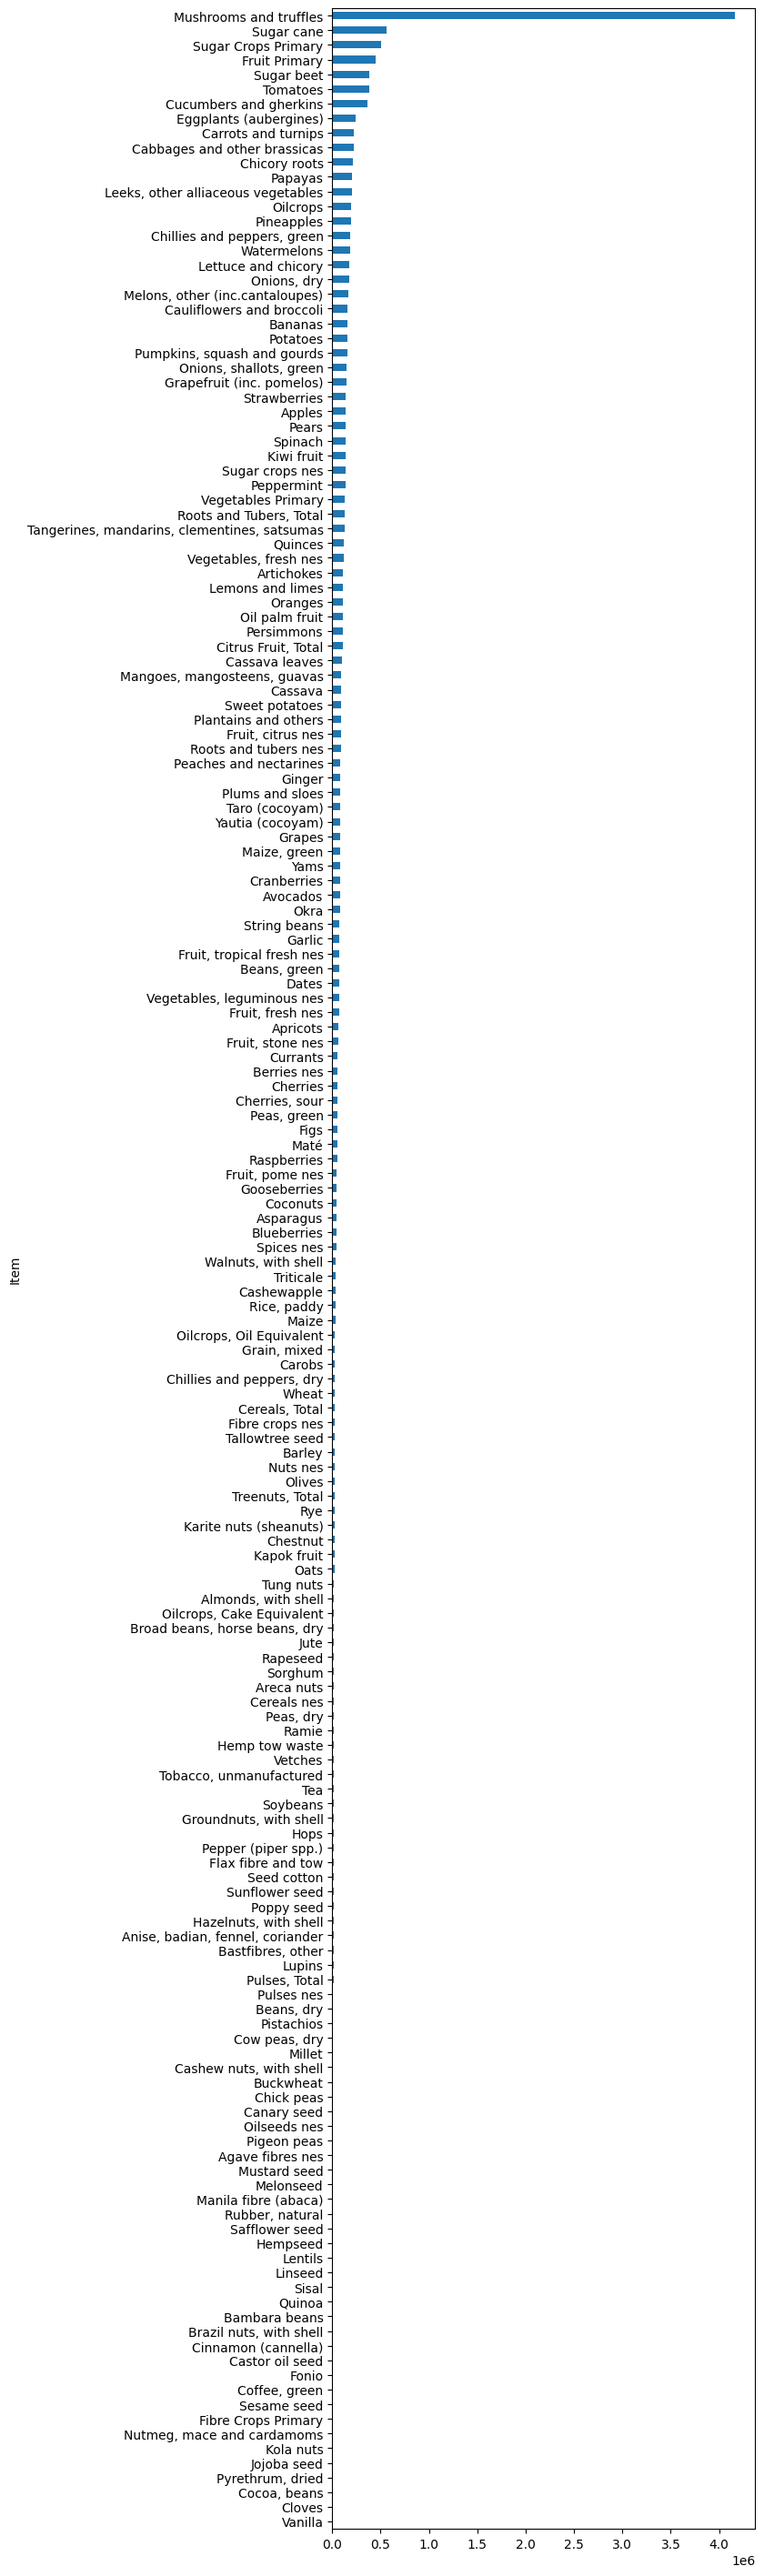

In [98]:
df[df['Element']=='Yield'][['Item', 'Values']].dropna().groupby(['Item'])['Values'].mean().sort_values(ascending=True).plot.barh(figsize=(6, 36))

<Axes: ylabel='Item'>

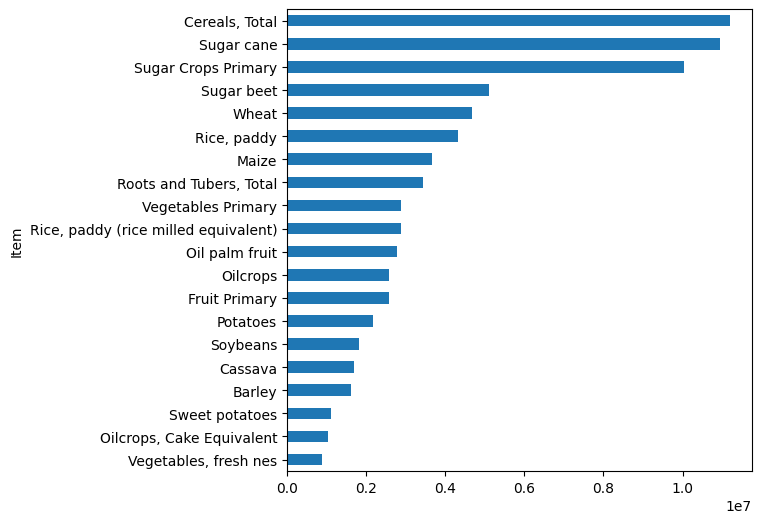

In [85]:
# df[df['Element']=='Yield'].groupby(['Item'])['Values'].mean().sort_values(ascending=False).plot.bar(figsize=(12, 6))
# plot bars vertically
df[df['Element']=='Production'][['Item', 'Values']].dropna().groupby(['Item'])['Values'].mean().sort_values(ascending=True)[-20:].plot.barh(figsize=(6, 6))


<Axes: ylabel='Area'>

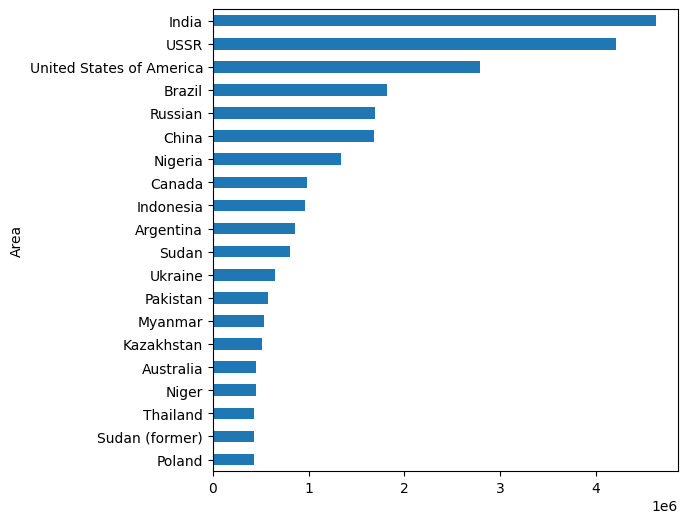

In [141]:
df[df['Element']=='Area harvested'][['Area', 'Values']].dropna().groupby(['Area'])['Values'].mean().sort_values(ascending=True)[-20:].plot.barh(figsize=(6, 6))


<Axes: ylabel='Area'>

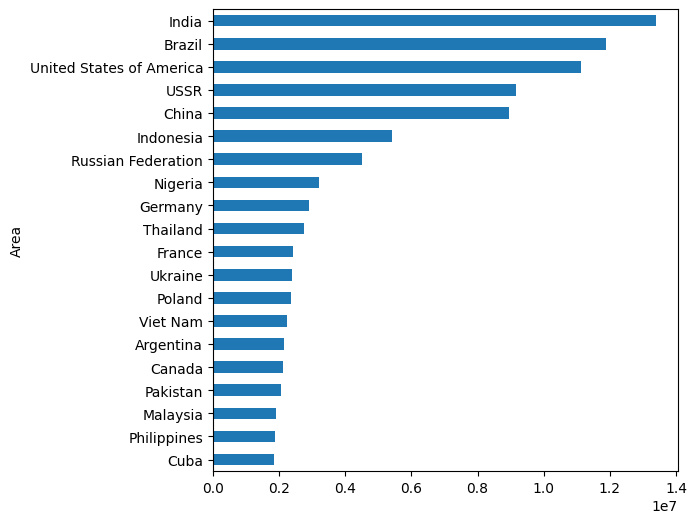

In [91]:
df[df['Element']=='Production'][['Area', 'Values']].dropna().groupby(['Area'])['Values'].mean().sort_values(ascending=True)[-20:].plot.barh(figsize=(6, 6))

<Axes: ylabel='Area'>

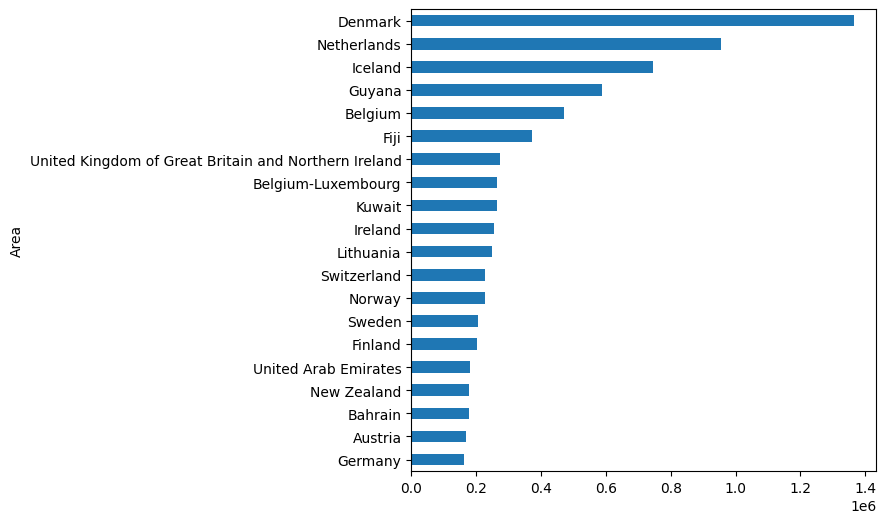

In [92]:
df[df['Element']=='Yield'][['Area', 'Values']].dropna().groupby(['Area'])['Values'].mean().sort_values(ascending=True)[-20:].plot.barh(figsize=(6, 6))

In [93]:
df['Area'].value_counts()

Area
China               44073
Mexico              22007
Spain               21299
Peru                19470
Bulgaria            19470
                    ...  
Iceland              2006
Tokelau              1593
Tuvalu               1593
Marshall Islands      708
Faroe Islands         354
Name: count, Length: 207, dtype: int64

In [67]:
df[df['Area'].str.startswith('China')]

Area Code  Area                       Item Code  Item                         Element Code  Element         Unit    Year  Values    Flags  Flag Description                                                            
41         China, mainland            15         Wheat                        5419          Yield           hg/ha   1961  5578.0    Fc     Calculated data                                                                 1
96         China, Hong Kong SAR       394        Pumpkins, squash and gourds  5419          Yield           hg/ha   2017  482000.0  Fc     Calculated data                                                                 1
                                                                              5510          Production      tonnes  1972  5000.0    F      FAO estimate                                                                    1
                                                                                                                    1971 

In [35]:
df['Item'].value_counts()[:20]

Item
Roots and Tubers, Total         36462
Fruit Primary                   36403
Vegetables Primary              36403
Vegetables, fresh nes           35754
Oilcrops                        35400
Oilcrops, Oil Equivalent        35400
Oilcrops, Cake Equivalent       34987
Cereals, Total                  34102
Pulses, Total                   32273
Maize                           31919
Tomatoes                        31447
Fruit, fresh nes                30385
Potatoes                        29736
Sugar Crops Primary             29028
Cabbages and other brassicas    28202
Citrus Fruit, Total             28143
Onions, dry                     26668
Tobacco, unmanufactured         26314
Fibre Crops Primary             25665
Bananas                         25488
Name: count, dtype: int64

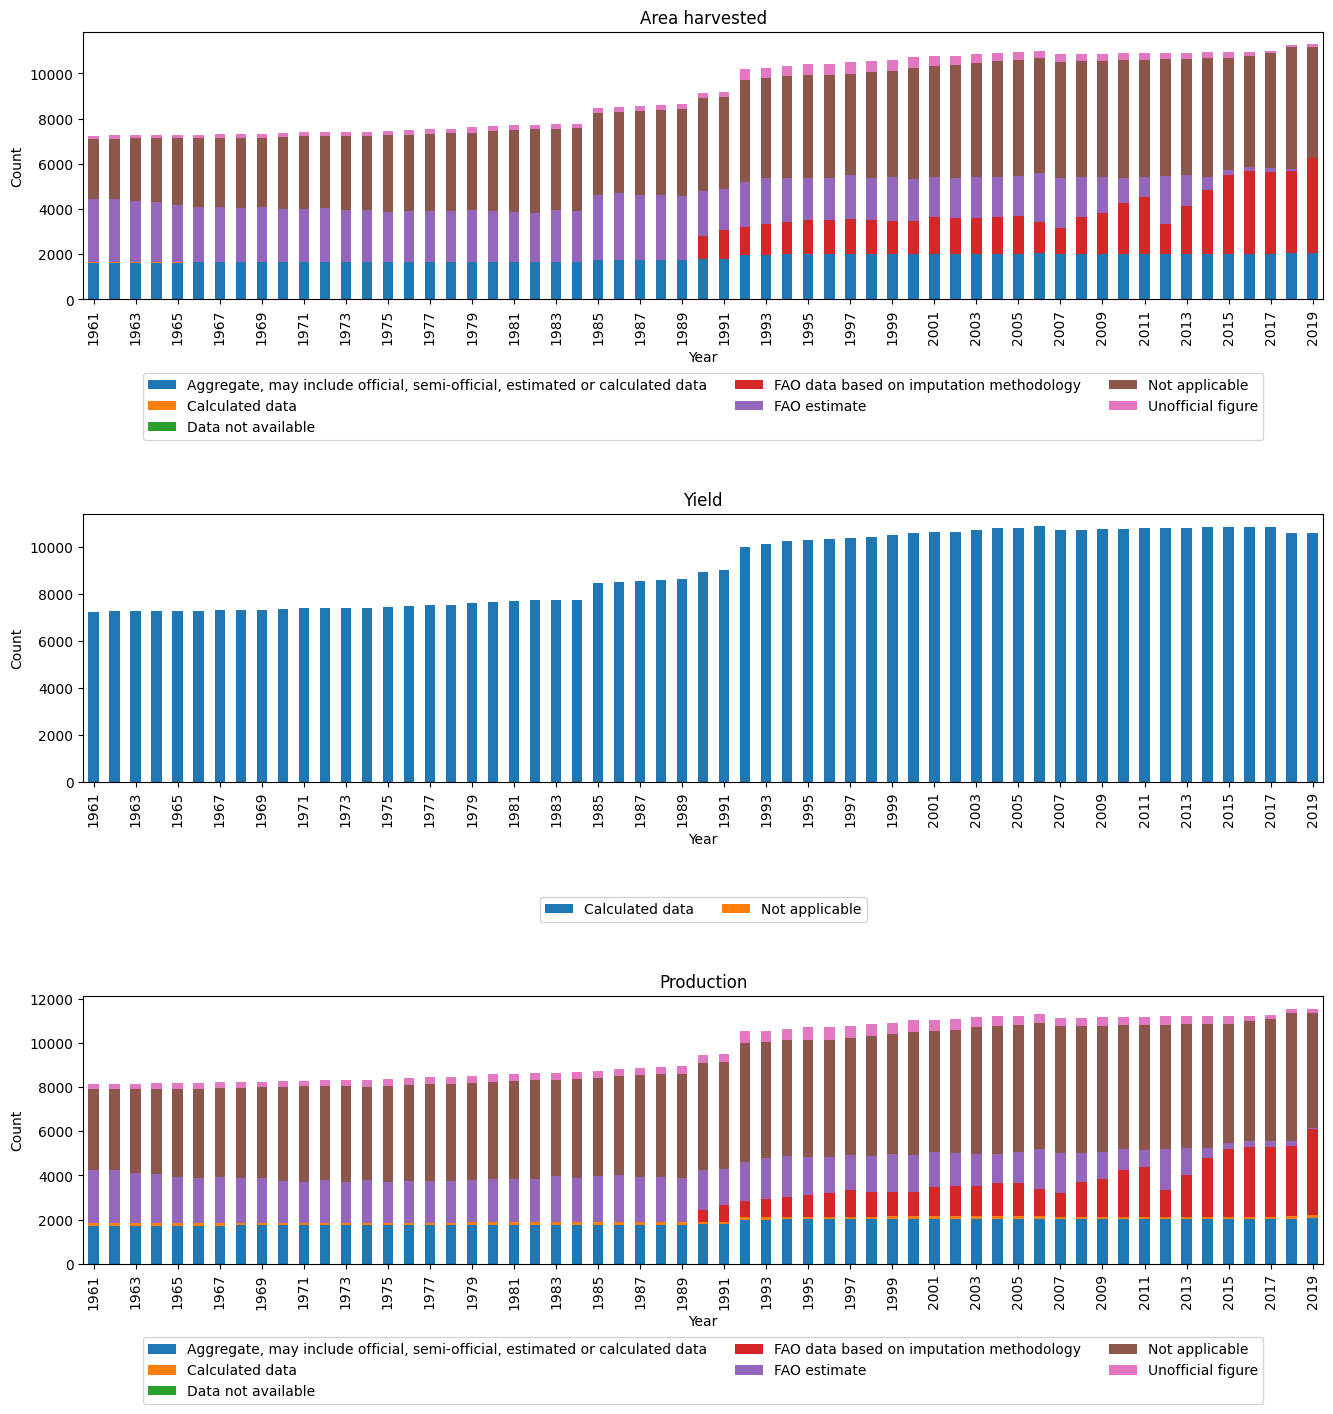

In [18]:
fig, axs = plt.subplots(figsize=(16, 16), nrows=3, ncols=1)
fig.subplots_adjust(hspace=0.8, wspace=0.5)

for i, element in enumerate(df['Element'].unique()):
    element_data = df[df['Element'] == element]
    element_data.groupby(['Year', 'Flag Description'])['Values'].count().unstack().plot.bar(ax=axs[i], stacked=True)
    axs[i].set_title(element)
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Count')
    axs[i].set_xticks(range(0, len(element_data['Year'].unique()), 2))
    # legend bottom center
    axs[i].legend(loc='lower center', bbox_to_anchor=(0.5, -0.55), ncol=3)

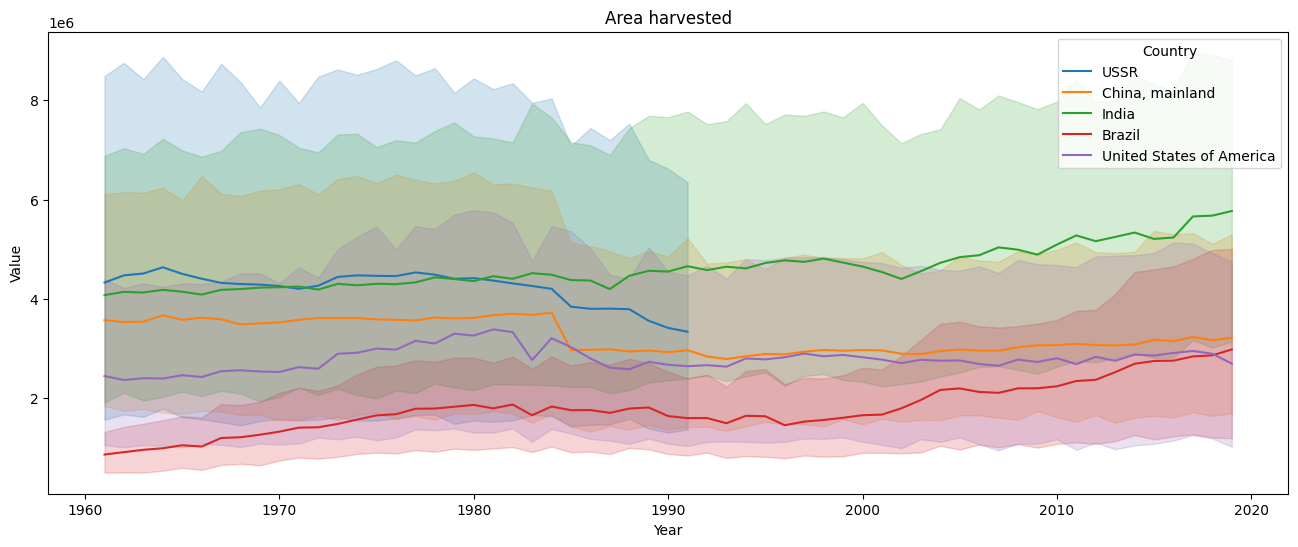

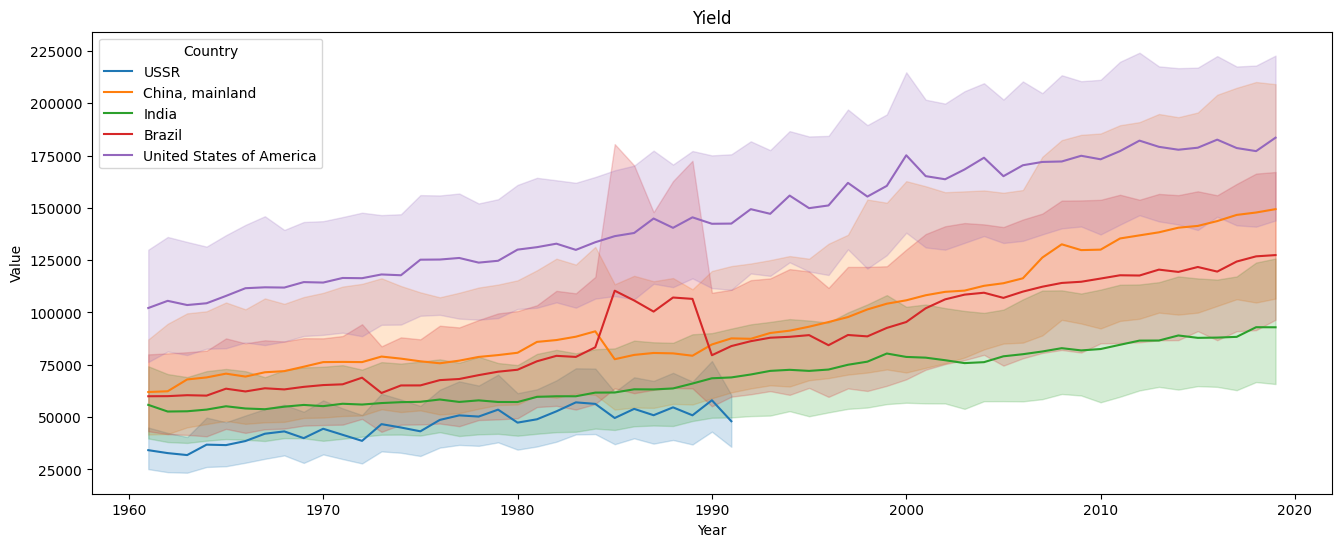

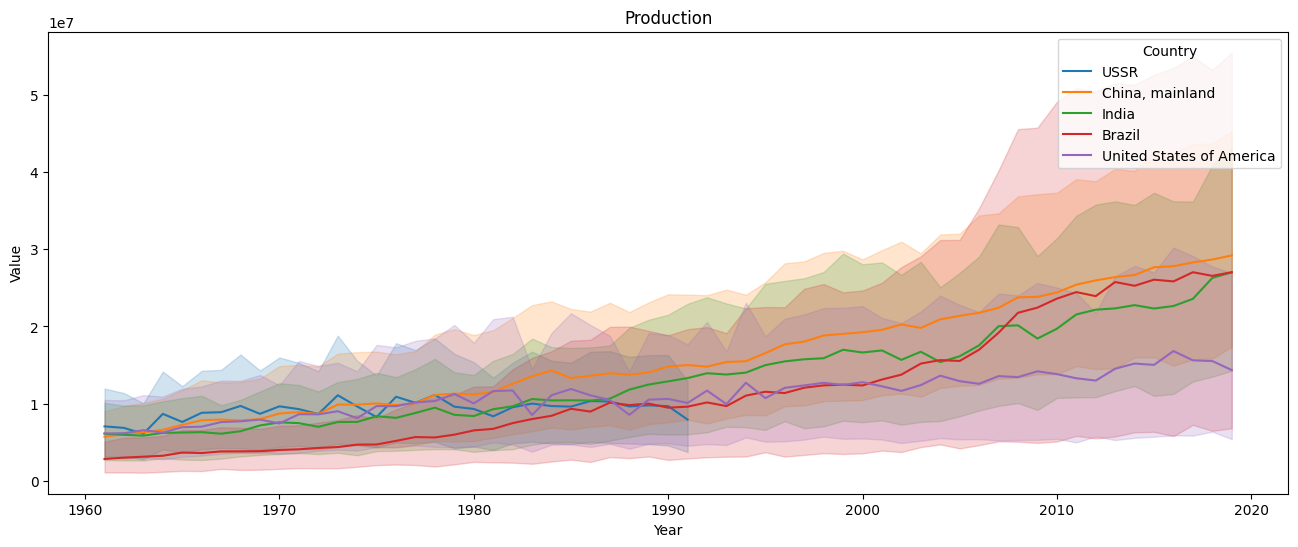

In [17]:
top_countries = df.groupby(['Area', 'Element'])['Values'].mean().unstack().sum(axis=1).nlargest(5).index
top_countries_data = df[df['Area'].isin(top_countries)]

for element in top_countries_data['Element'].unique():
    plt.figure(figsize=(16, 6))
    sns.lineplot(data=top_countries_data[top_countries_data['Element'] == element], x='Year', y='Values', hue='Area')
    plt.title(element)
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend(title='Country')
    plt.show()


In [152]:
# You will need to install geopandas and plotly-express
import geopandas as gpd
import plotly.express as px

# Load world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'name': 'Area'})

latest_year = df['Year'].max()
latest_year_data = df[df['Year'] == latest_year]

for element in latest_year_data['Element'].unique():
    element_data = latest_year_data[latest_year_data['Element'] == element].groupby('Area')['Values'].mean().reset_index()
    merged = world.merge(element_data, on='Area', how='left')
    
    fig = px.choropleth(merged, geojson=merged.geometry, locations=merged.index, color='Values',
                        title=f"{element} in {latest_year}",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        projection='natural earth', range_color=[0, merged['Values'].quantile(0.9)])
    fig.update_geos(fitbounds="locations", visible=False)
    fig.show()


In [32]:
country_pivot = df.pivot_table(index=['Area', 'Year'], columns='Element', values='Values').reset_index()
correlations = country_pivot.groupby('Area')[['Area harvested', 'Yield', 'Production']].corr().reset_index()
# correlations = correlations.pivot(index='Area', columns='Element', values='Production')#.drop(columns=['Production'])
print(correlations)


Element         Area         Element  Area harvested     Yield  Production
0        Afghanistan  Area harvested        1.000000 -0.407267    0.099683
1        Afghanistan           Yield       -0.407267  1.000000    0.491780
2        Afghanistan      Production        0.099683  0.491780    1.000000
3            Albania  Area harvested        1.000000 -0.871596    0.235483
4            Albania           Yield       -0.871596  1.000000    0.087538
..               ...             ...             ...       ...         ...
625           Zambia           Yield        0.113864  1.000000    0.289087
626           Zambia      Production        0.845572  0.289087    1.000000
627         Zimbabwe  Area harvested        1.000000  0.547233    0.673388
628         Zimbabwe           Yield        0.547233  1.000000    0.619640
629         Zimbabwe      Production        0.673388  0.619640    1.000000

[630 rows x 5 columns]


In [ ]:
correlations = correlations.pivot(index='Area', columns='Element', values='Production')#.drop(columns=['Production'])

In [ ]:
flag_counts = df.groupby(['Element', 'Year'])['Flags'].value_counts().unstack().fillna(0)
for element in flag_counts.index.levels[0]:
    element.plot.bar(stacked=True)
    plt.xlabel('Year')
    plt.ylabel('Flag Count')
    plt.title(element)
    plt.xticks(rotation=90)
    # xticks every 5 years
    # plt.xticks(range(0, len(flag_counts.columns), 5), flag_counts.columns[::5])
# flag_counts.plot.bar(stacked=True)
# plt.xlabel('Element, Year')
# plt.ylabel('Flag Count')
# plt.xticks(rotation=90)
# # xticks every 5 years
# plt.xticks(range(0, len(flag_counts.index), 5), flag_counts.index[::5])
# plt.show()


AttributeError: 'str' object has no attribute 'plot'

In [ ]:
df.groupby(['Element', 'Year'])['Flags']

In [ ]:
for a in df.groupby(['Element', 'Year'])['Flags']:
    print(a)
    break

(('Area harvested', 1961), 0          M
3          M
6        NaN
9        NaN
12       NaN
        ... 
38131      A
38134      A
38137      A
38140      A
38143      A
Name: Flags, Length: 12937, dtype: object)
